AI-powered Calories Burnt Predictor from Exercise & Health Metrics
This project aims to predict calories burnt using physiological and activity data, leveraging regression models and model tuning.

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing the Data

In [9]:
calories=pd.read_csv("calories.csv")

In [11]:
calories.head(5)


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [13]:
exercise=pd.read_csv("exercise.csv")

In [15]:
exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Analyzing the Data

In [18]:
data=pd.concat([exercise,calories['Calories']],axis=1)

In [20]:
data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [22]:
data.shape

(15000, 9)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [26]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [28]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Visualizing `

In [31]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

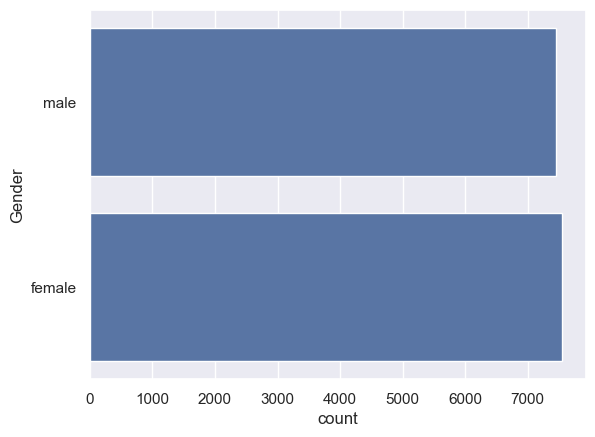

In [33]:
sns.countplot(data['Gender'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

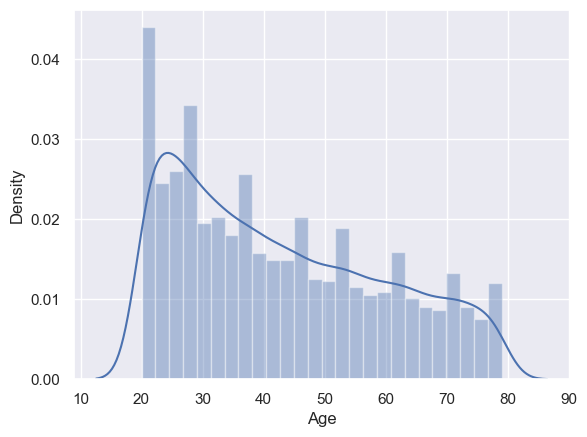

In [35]:
sns.distplot(data['Age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\4069851554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

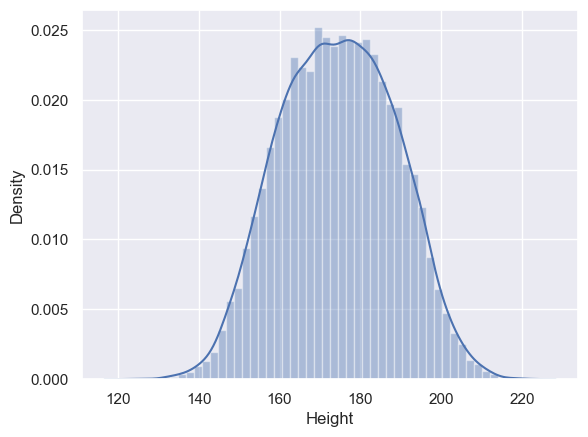

In [37]:
sns.distplot(data['Height'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\2799343561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

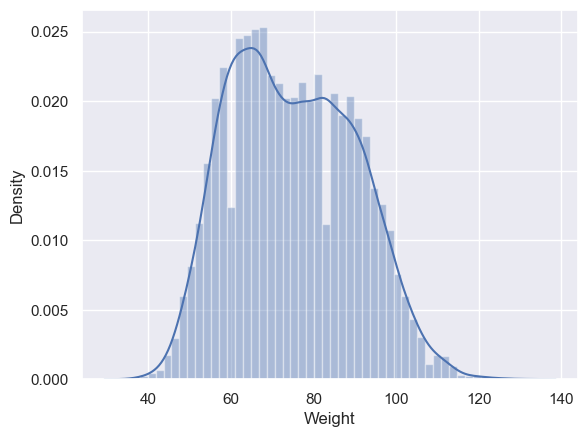

In [39]:
sns.distplot(data['Weight'])

# Understanding Correlations

In [42]:
correlation=data.corr(numeric_only=True)

<Axes: >

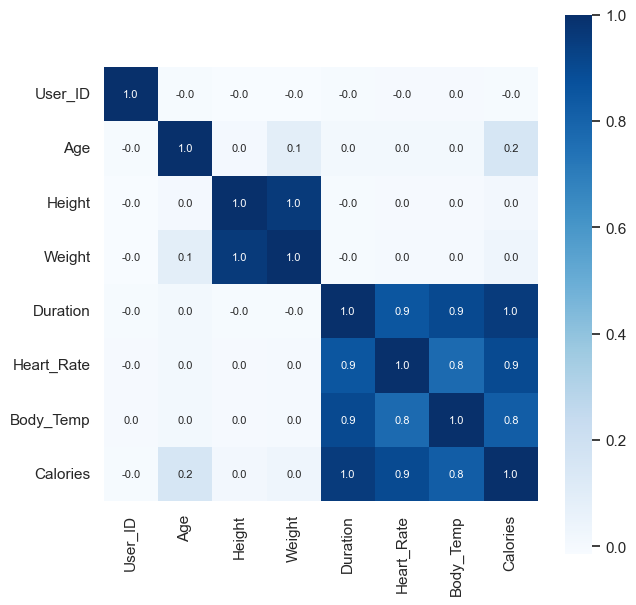

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

# Encoding

In [50]:
data.replace({"Gender":{"male":0,"female":1}},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\359284724.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Gender":{"male":0,"female":1}},inplace=True)


# Splitting the data for training and testing

In [53]:
x=data.drop(columns=['User_ID','Calories'],axis=1)
y=data['Calories']

In [55]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [57]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [59]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
print(x.shape,x_test.shape,x_train.shape)

(15000, 7) (3000, 7) (12000, 7)


# Evaluating the model

In [67]:
model=XGBRegressor()

In [69]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [71]:
model.score(x_train,y_train)*100,model.score(x_test,y_test)*100

(99.95777219604747, 99.88678909361674)

In [73]:
test_data_prediction=model.predict(x_test)
test_data_prediction

array([172.07645 , 195.7858  ,  51.708874, ..., 121.50776 ,  19.239851,
       214.43597 ], dtype=float32)

In [75]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error is:",mae)

Mean Absolute Error is: 1.4981198125282924


In [77]:
rmse = metrics.mean_squared_error(y_test, test_data_prediction)
print("RMSE:", rmse)

RMSE: 4.568956111227719


In [79]:
r2 = metrics.r2_score(y_test, test_data_prediction)
print("R² Score:", r2)

R² Score: 0.9988678909361673


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)

# 2. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)

# 3. XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)
xgb_preds = xgb.predict(x_test)

In [85]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print("-" * 40)

# Evaluate all models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

Linear Regression Performance:
RMSE: 11.49
R² Score: 0.97
----------------------------------------
Random Forest Performance:
RMSE: 2.67
R² Score: 1.00
----------------------------------------
XGBoost Performance:
RMSE: 1.75
R² Score: 1.00
----------------------------------------


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Feature Importance

C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\943082742.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


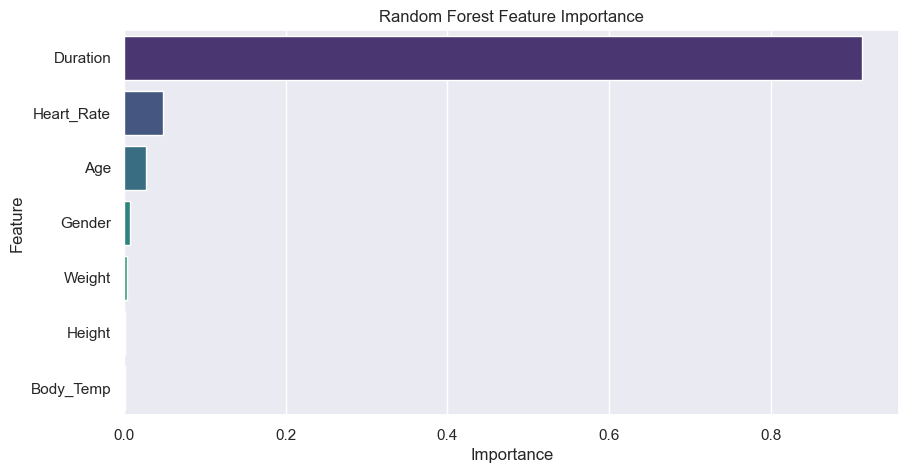

In [88]:
import pandas as pd

# Get feature importances from trained Random Forest
importances = rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Actual vs Predicted 

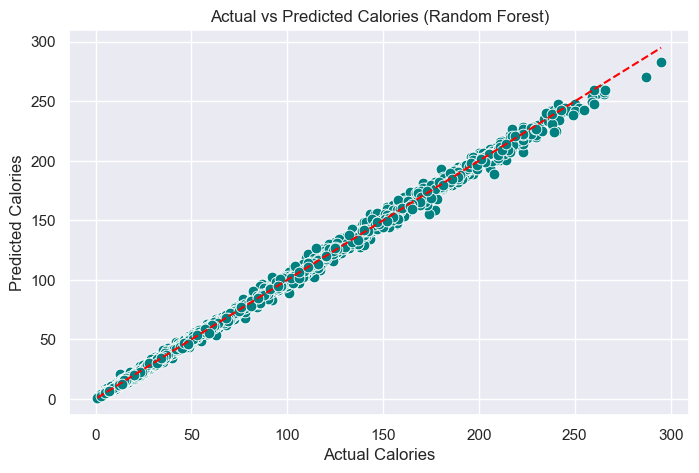

In [91]:
# Replace 'rf_preds' with predictions from any model (lr_preds, xgb_preds, etc.)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=rf_preds, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories (Random Forest)')
plt.grid(True)
plt.show()


# Hyperparameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

grid_search_rf.fit(x_train, y_train)
print("✅ Best Params (RF):", grid_search_rf.best_params_)

# Evaluate tuned model
rf_best = grid_search_rf.best_estimator_
rf_tuned_preds = rf_best.predict(x_test)

print("\n🔹 RandomForest After Tuning:")
print(f"RMSE: {mean_squared_error(y_test, rf_tuned_preds, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, rf_tuned_preds):.2f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Params (RF): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

🔹 RandomForest After Tuning:
RMSE: 2.65
R² Score: 1.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [96]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=1,
    random_state=42
)

random_search_xgb.fit(x_train, y_train)
print("✅ Best Params (XGBoost):", random_search_xgb.best_params_)

# Evaluate tuned XGBoost
xgb_best = random_search_xgb.best_estimator_
xgb_tuned_preds = xgb_best.predict(x_test)

print("\n🔹 XGBoost After Tuning:")
print(f"RMSE: {mean_squared_error(y_test, xgb_tuned_preds, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, xgb_tuned_preds):.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Params (XGBoost): {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}

🔹 XGBoost After Tuning:
RMSE: 1.77
R² Score: 1.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Additional Features

In [99]:
# Copy of original data (optional, for comparison)
data_original = data.copy()

# Convert height from cm to meters
data['Height_m'] = data['Height'] / 100

# ➤ BMI: Body Mass Index
data['BMI'] = data['Weight'] / (data['Height_m'] ** 2)

# ➤ Calories burned per minute
data['Calories_per_minute'] = data.apply(
    lambda row: row['Calories'] / row['Duration'] if row['Duration'] != 0 else 0, axis=1
)

# ➤ Polynomial/interaction features
data['BMI_squared'] = data['BMI'] ** 2
data['BMI_Age'] = data['BMI'] * data['Age']
data['Weight_Duration'] = data['Weight'] * data['Duration']

# Drop temporary column
data.drop(columns=['Height_m'], inplace=True)


In [101]:
import pandas as pd

# Load both datasets
exercise_df = pd.read_csv("exercise.csv")
calories_df = pd.read_csv("calories.csv")

# Merge on 'User_ID'
merged_df = pd.merge(exercise_df, calories_df, on='User_ID')

# Derived Feature 1: BMI = weight (kg) / (height in m)^2
merged_df['Height_m'] = merged_df['Height'] / 100
merged_df['BMI'] = merged_df['Weight'] / (merged_df['Height_m'] ** 2)

# Derived Feature 2: Age Bins
merged_df['Age_Group'] = pd.cut(merged_df['Age'],
                                bins=[0, 18, 30, 45, 60, 100],
                                labels=['Teen', 'Young Adult', 'Adult', 'Middle-aged', 'Senior'])

# Drop intermediate height in meters column
merged_df.drop(columns='Height_m', inplace=True)

# Preview the final merged data
merged_df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Age_Group
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,Senior
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,Young Adult
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,Senior
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,Adult
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,Young Adult


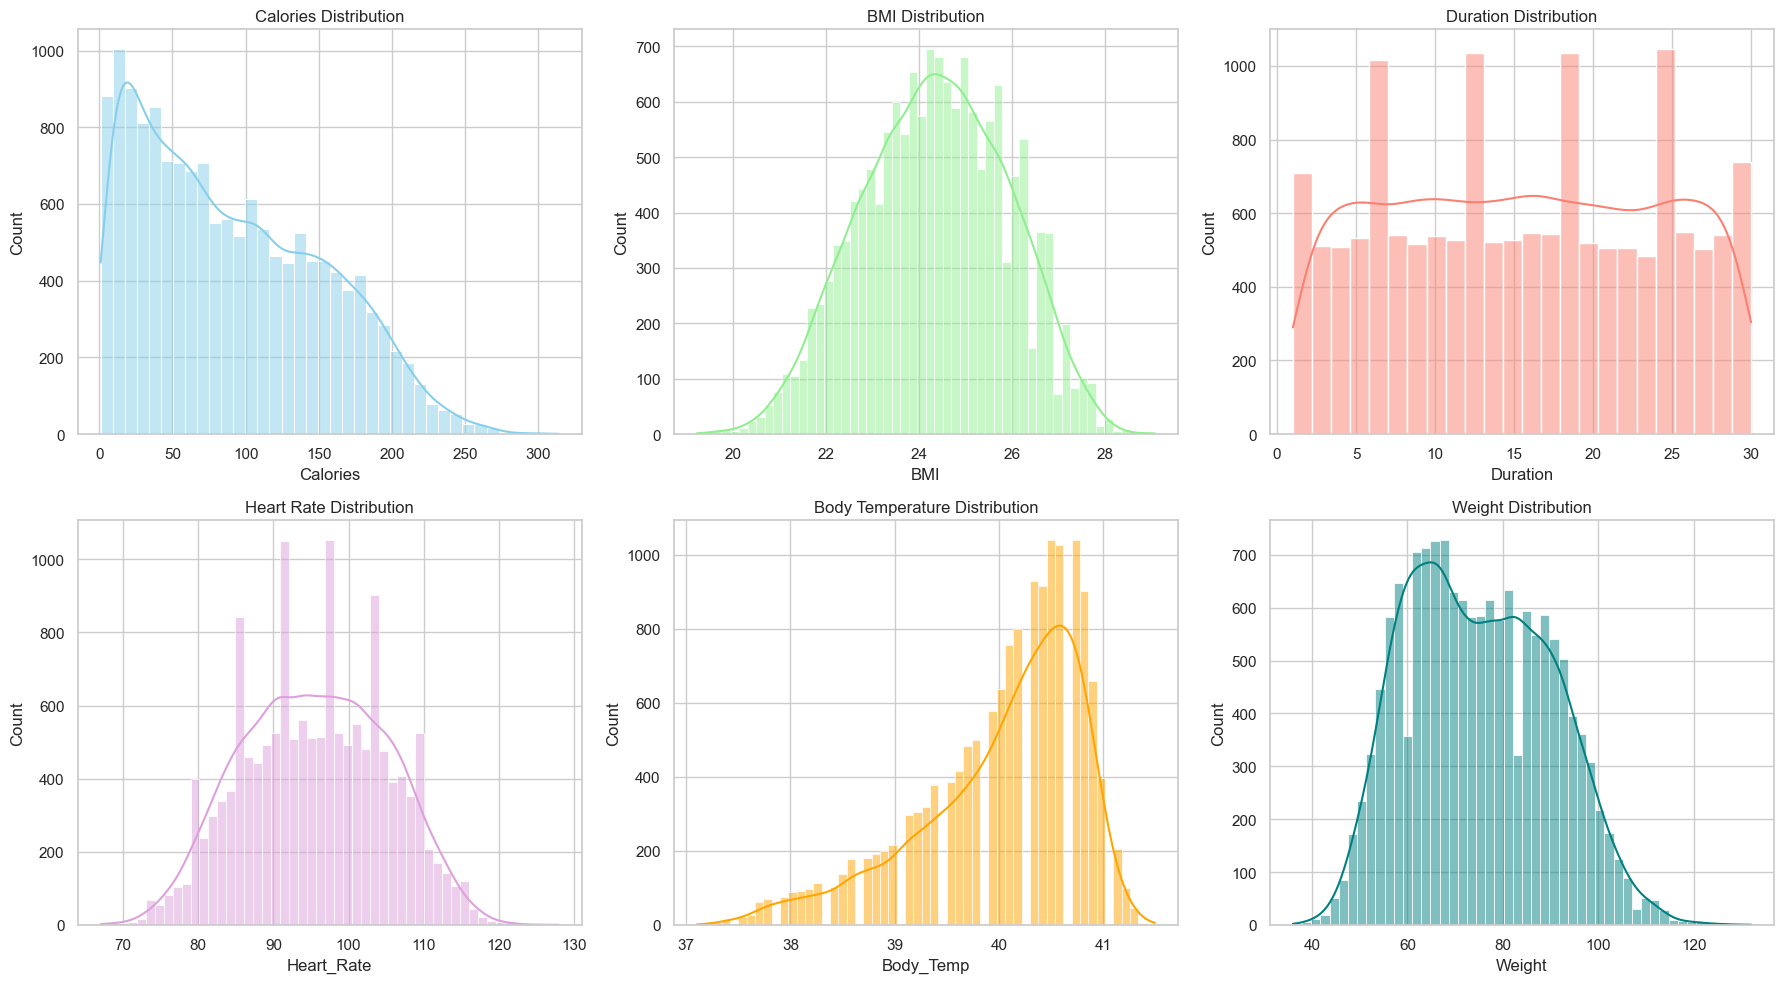

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(merged_df['Calories'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Calories Distribution')
sns.histplot(merged_df['BMI'], kde=True, ax=axes[0, 1], color='lightgreen').set_title('BMI Distribution')
sns.histplot(merged_df['Duration'], kde=True, ax=axes[0, 2], color='salmon').set_title('Duration Distribution')
sns.histplot(merged_df['Heart_Rate'], kde=True, ax=axes[1, 0], color='plum').set_title('Heart Rate Distribution')
sns.histplot(merged_df['Body_Temp'], kde=True, ax=axes[1, 1], color='orange').set_title('Body Temperature Distribution')
sns.histplot(merged_df['Weight'], kde=True, ax=axes[1, 2], color='teal').set_title('Weight Distribution')

plt.tight_layout()
plt.show()


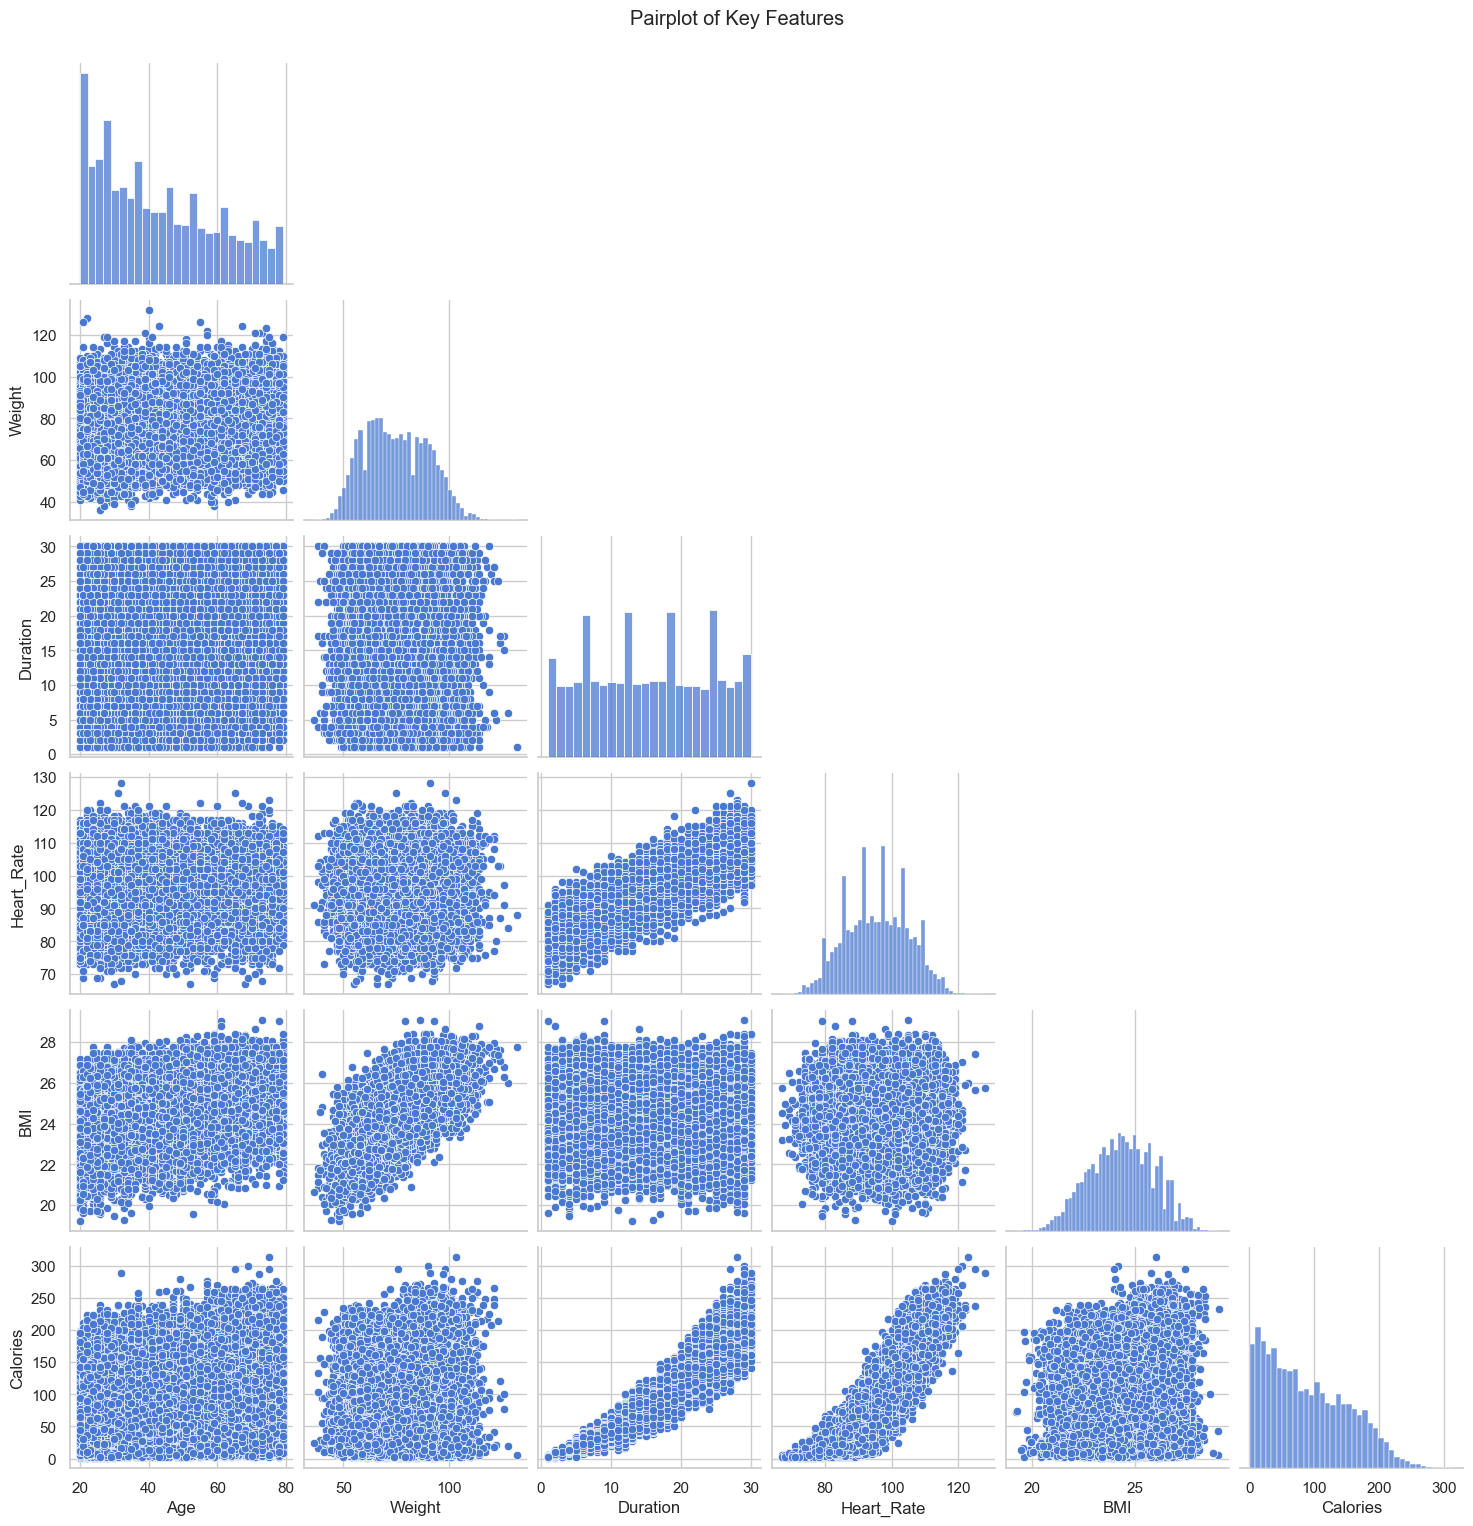

In [105]:
subset = merged_df[['Age', 'Weight', 'Duration', 'Heart_Rate', 'BMI', 'Calories']]
sns.pairplot(subset, corner=True)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


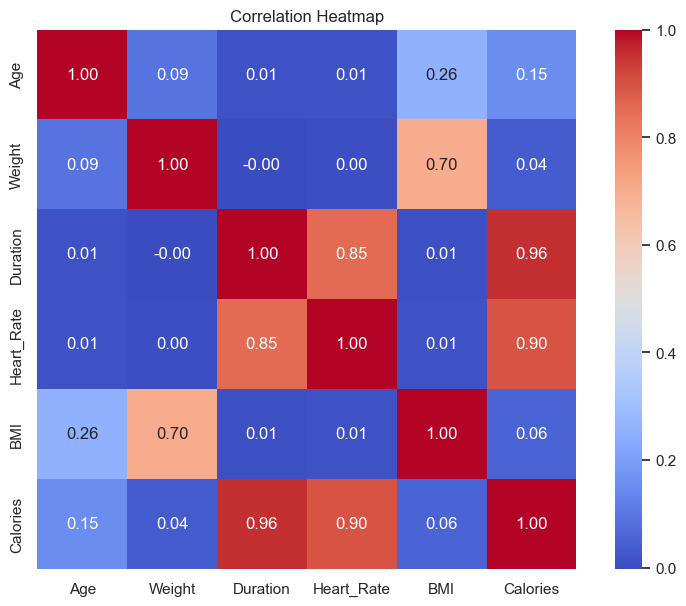

In [107]:
plt.figure(figsize=(10, 7))
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()


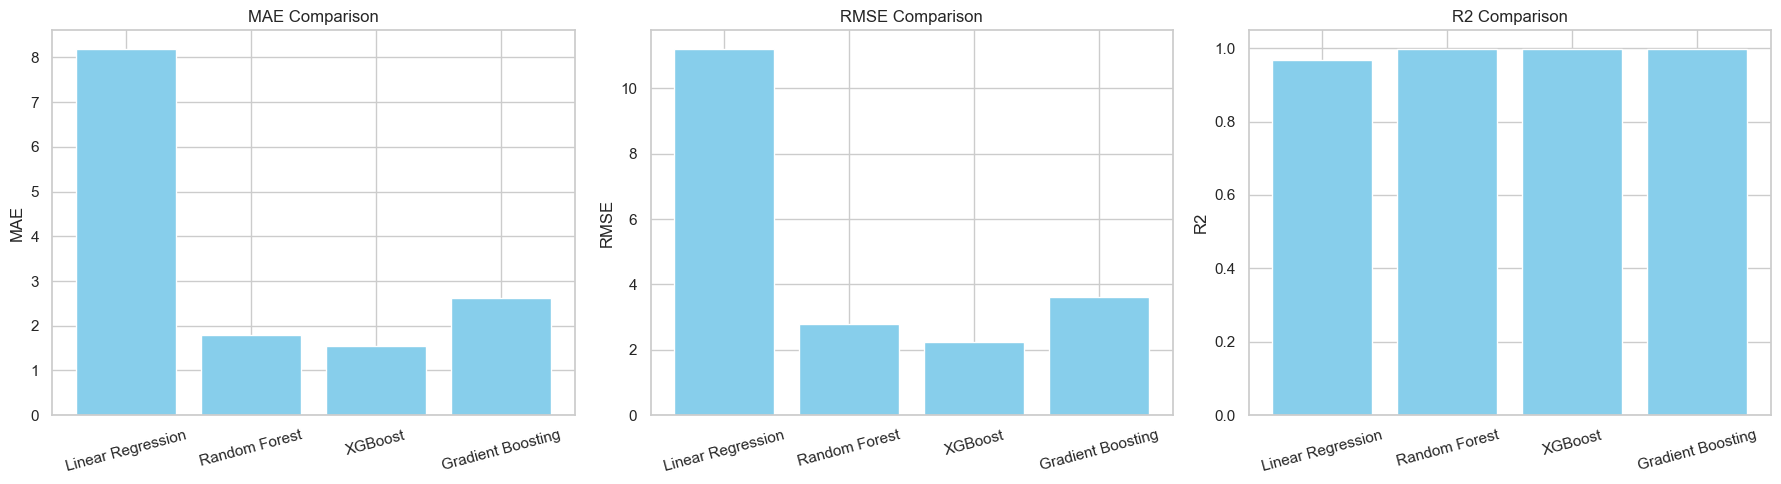

✅ Best Performing Model: XGBoost


In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# One-hot encoding for categorical features
df_encoded = pd.get_dummies(merged_df, columns=['Gender', 'Age_Group'], drop_first=True)

# Features and target
X = df_encoded.drop(columns=['User_ID', 'Calories'])
y = df_encoded['Calories']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Plot comparison
metrics = ['MAE', 'RMSE', 'R2']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, metric in enumerate(metrics):
    axes[i].bar(results.keys(), [results[m][metric] for m in results], color='skyblue')
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.show()

# Find best model based on R²
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
print(f"✅ Best Performing Model: {best_model_name}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\49901033.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_df, x='Importance', y='Feature', palette='crest')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\49901033.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


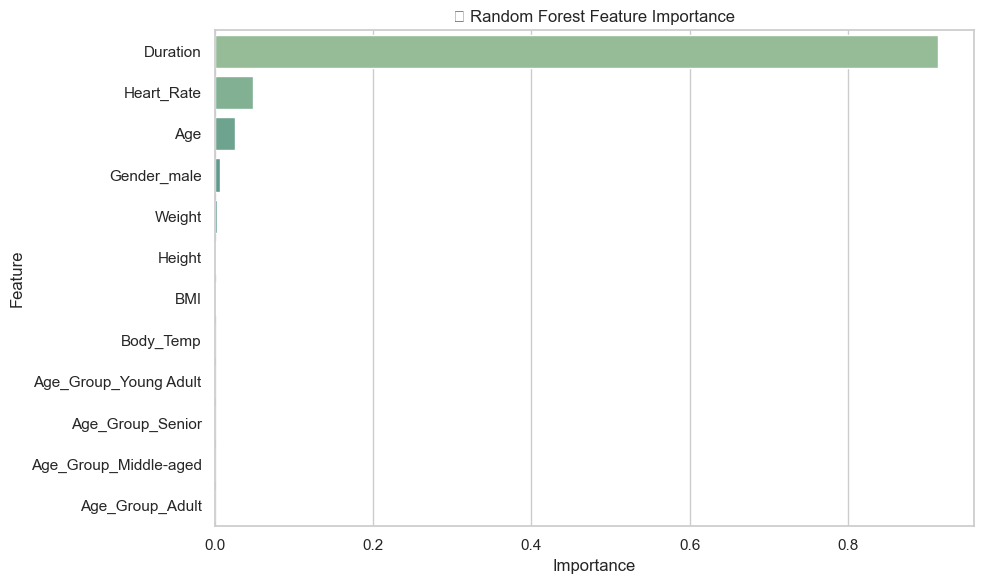

C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\49901033.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_df, x='Importance', y='Feature', palette='flare')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\49901033.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


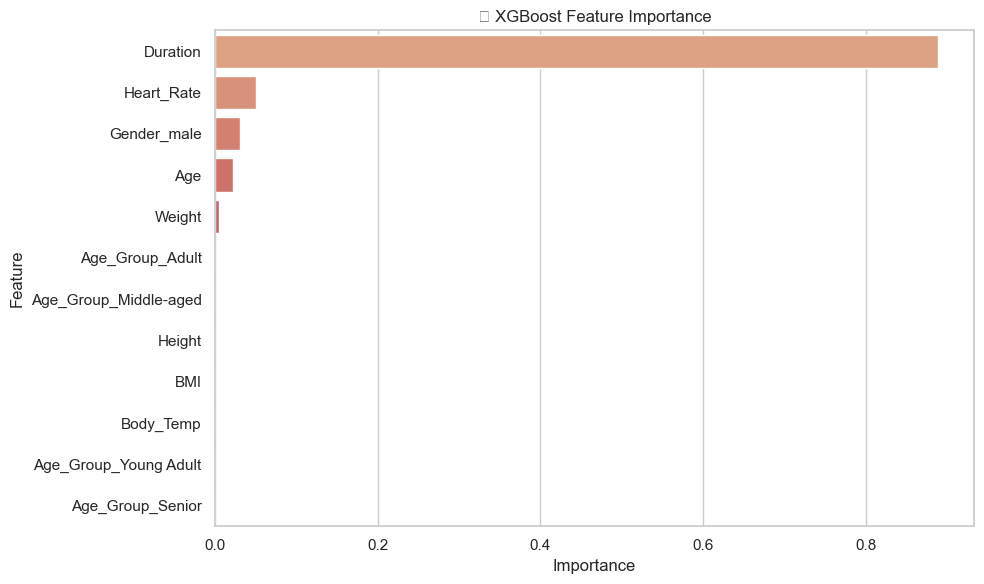

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Fit best models again if needed
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

# Get importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Create DataFrames
rf_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)
xgb_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)

# Plot Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_df, x='Importance', y='Feature', palette='crest')
plt.title("📊 Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# Plot XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_df, x='Importance', y='Feature', palette='flare')
plt.title("📊 XGBoost Feature Importance")
plt.tight_layout()
plt.show()


In [115]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


PermutationExplainer explainer: 3001it [07:25,  6.63it/s]                          


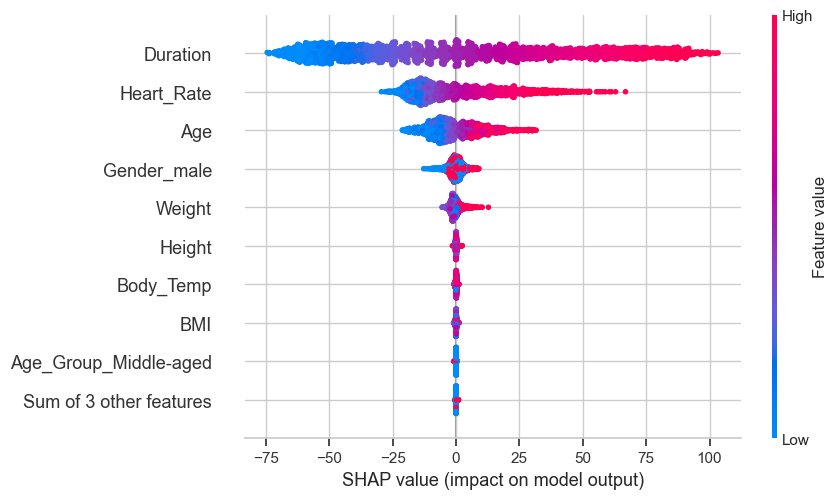

In [119]:
# Ensure X_test is numeric and float
X_test_numeric = X_test.astype(float)

# SHAP Explainer and values
explainer = shap.Explainer(xgb_model.predict, X_test_numeric)
shap_values = explainer(X_test_numeric)

# Beeswarm plot
shap.plots.beeswarm(shap_values)


In [127]:
import pickle
pickle.dump(xgb_model, open("calorie_model.pkl", "wb"))
